Sep 25 Yang et al. catalog

- test 3rd algorithm to find the fastest way doing sum up;
   + sort the group id together 
   + sum up
- plot M_h vs N_GC;

-> yah it works, within only 1min, and saved into 'M_h_NGCs_test3_final.fits'/ 'M_h_NGCs_test4.fits'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from astropy.table import Table

In [4]:
import astropy.io.fits as fits

In [5]:
path='/data/lemn/DESIdata/'

- find galaxies in the same group;

- sum up their GCs and plot M_h of group vs. #GCs.

In [6]:
#load data after applied the model on Yang
data2 = fits.getdata('/data/lemn/results/M_z_NGCs_Yangcat.fits')
#M_z = data2['M_z']
N_GC = data2['NGCs']

In [7]:
#load infor of members in group
mem = fits.getdata(path+'members/iDESIDR9_NGC_1.fits')

In [59]:
igroup_ID = mem['groupID']

In [9]:
#load infor of members in group
group = fits.getdata(path+'groups/DESIDR9_NGC_group.fits')

In [57]:
group_ID = group['groupID']

In [10]:
richness = group['richness']

In [11]:
M_group = group['log M_h [M_sun/h]'] #[M_sun/h]

In [12]:
h = 0.7                    #Planck parameters
M_group = 10**(M_group)*h  # [M_sun], unit in catalog is log10 Msun

In [13]:
sort_id = np.argsort(igroup_ID)

1st algorithm

In [14]:
import time
t0 = time.time()

In [15]:
n_stop = len(M_group)
test_sum = np.zeros(n_stop)
j = 0
test_sum[0] = N_GC[sort_id[0]]

for i in range(1,len(sort_id)):
    if igroup_ID[sort_id[i]] == igroup_ID[sort_id[i-1]]:
        test_sum[j] += N_GC[sort_id[i]]
    else:
        j += 1
        if j < n_stop:
            test_sum[j] = N_GC[sort_id[i]]
        else:
            break
#print(test_sum)

In [16]:
t1 = time.time()
print('running time', t1-t0)

running time 65.10234069824219


In [17]:
tot = np.sum(richness)

In [18]:
print(tot, len(igroup_ID))

67197600.0 67197600


In [19]:
richness = richness.astype(int)

2nd algorithm

In [63]:
import time
t0 = time.time()

In [64]:
#test with richness
test_sum2 = np.zeros(len(M_group))

In [65]:
#the remaining terms
start = 0
for i in range(0,len(M_group)):
    stop = start + richness[i]
    for j in range(start,stop):
        test_sum2[i] += N_GC[sort_id[j]]
    start = stop

In [66]:
t1 = time.time()
print('running time', t1-t0)

running time 57.89050078392029


In [67]:
print(test_sum2)

[9.30744172e+04 5.00667353e+04 6.82916544e+04 ... 8.99762187e+01
 5.03870569e+02 4.00759153e+01]


In [72]:
a = np.argwhere(richness == 1)

In [74]:
count = 0
for i in a:
    if M_group[i]  < 1.1e14 and M_group[i] > 1e14:
        count += 1
print(count)
#=> there are groups with only 1 member but very massive -> their number of GCs are high!

125


In [94]:
a = np.argwhere(M_group < 6.5e10)

In [95]:
print(len(a))

205816


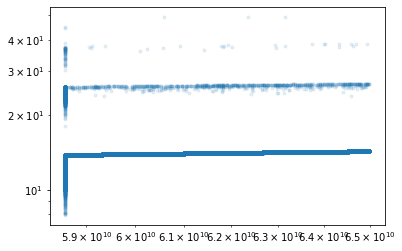

In [96]:
plt.loglog(M_group[a],test_sum2[a],'.', alpha=0.1)

In [62]:
#check if the sort and the group ID are the same
start = 0
for i in range(0,len(M_group)):
    stop = start + richness[i]
    for j in range(start,stop):
        if igroup_ID[sort_id[j]] != group_ID[i]:
            print(igroup_ID[sort_id[j]], group_ID[i])
    start = stop

In [29]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [30]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

In [31]:
#load Forbes 18 data
M_halo_F = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [32]:
#load blue GCs from Creasey data
M_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(0))
N_Creasey = np.loadtxt('/data/lemn/datalit/Creasey_Data.txt',usecols=(1))

In [33]:
Atlas_H = fits.getdata('/data/lemn/results/M_h_NGCs_Harris-Atlas.fits')

In [34]:
check     = Atlas_H['check T F central']
sum_NGC   = Atlas_H['NGCs']
M_h_array = Atlas_H['M_h M_sun']

In [35]:
dd = fits.getdata('/data/lemn/results/M_h_NGCs_test2.fits')
N_2 = dd['NGCs']

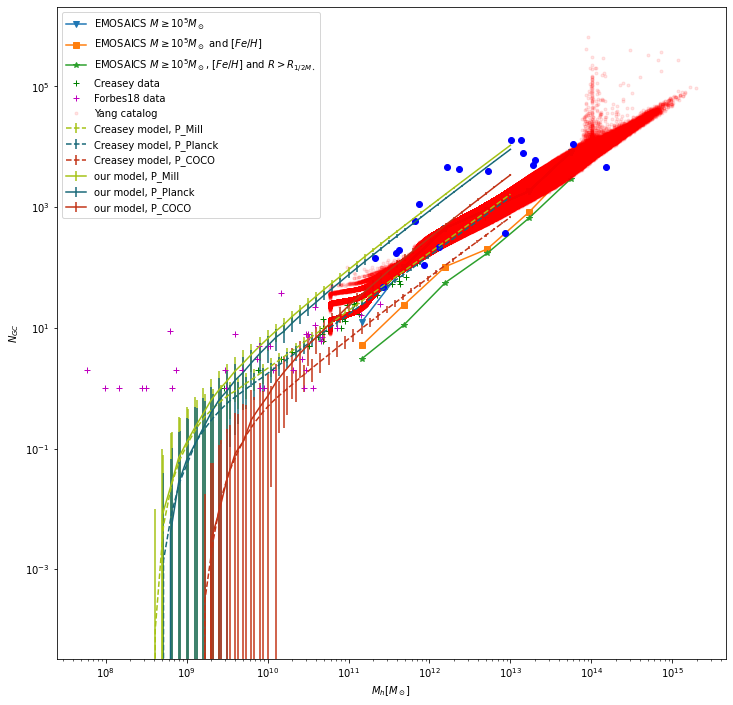

In [88]:

plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale('log')
plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')

plt.plot(M_Creasey, N_Creasey, 'g+', label ='Creasey data')
plt.plot(M_halo_F, N_GC_F, 'm+',     label ='Forbes18 data')

plt.loglog(M_group, test_sum2,'r.', alpha = 0.1, label='Yang catalog' )
for i in range(0,len(check)):
    if check[i] == 1:
        plt.plot(M_h_array[i],sum_NGC[i], 'bo')#, label = '#GCs in halos, true cen, Harris+Rvir data')

plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend()
#plt.savefig('tot_GC3.pdf')
#plt.show()